In [3]:
import wget

wget.download("https://www.shanelynn.ie/wp-content/uploads/2015/06/phone_data.csv")

100% [..............................................................................] 40576 / 40576

'phone_data.csv'

In [7]:
!conda install dateutil

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - dateutil

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [9]:
import dateutil
import pandas as pd
import numpy as np

In [10]:
df_phone = pd.read_csv('phone_data.csv')
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [11]:
df_phone.dtypes

index             int64
date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

date -> object 타입

날짜 데이터 형식으로 바꿔줌

In [14]:
df_phone['date'] = df_phone['date'].apply(dateutil.parser.parse,dayfirst =True)
df_phone.dtypes

index                    int64
date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

<AxesSubplot:xlabel='month'>

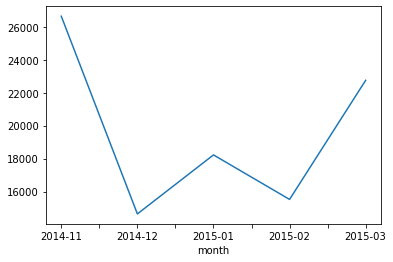

In [21]:
df_phone.groupby("month")['duration'].sum().plot()

In [26]:
index = df_phone['item'].unique()

data
call
sms


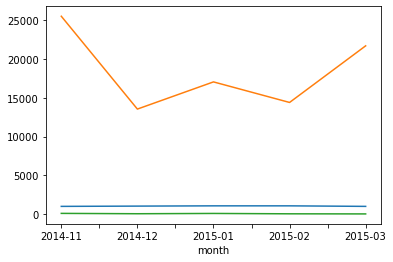

In [32]:
for i in index:
    print(i)
    df_phone[df_phone.item==i].groupby('month')['duration'].sum().plot()

In [41]:
df_phone.groupby(['month','item'])['duration'].max()

month    item
2014-11  call     1940.000
         data       34.429
         sms         1.000
2014-12  call     2120.000
         data       34.429
         sms         1.000
2015-01  call     1859.000
         data       34.429
         sms         1.000
2015-02  call     1863.000
         data       34.429
         sms         1.000
2015-03  call    10528.000
         data       34.429
         sms         1.000
Name: duration, dtype: float64

<AxesSubplot:xlabel='month'>

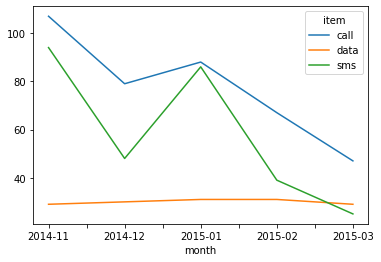

In [37]:
df_phone.groupby(['month','item'])['duration'].count().unstack().plot()

<AxesSubplot:xlabel='month'>

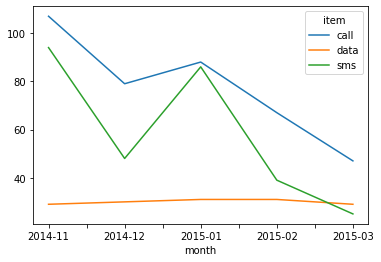

In [49]:
df_phone.groupby('month')['item'].value_counts().unstack().plot()

agg 사용

In [52]:
df_phone.groupby('month').agg({'duration':'sum'})

,duration
month,
2014-11,26639.441
2014-12,14641.870
2015-01,18223.299
2015-02,15522.299
2015-03,22750.441
